In [1]:
import pandas as pd
df_collab = pd.read_csv('C:\\Users\\Brend\\Downloads\\pct_collaborative_pubs_top42.csv', index_col = 'name', encoding = "UTF-8")
df_collab_new = pd.read_csv('C:\\Users\\Brend\\Downloads\\pct_collaborative_pubs_top42_v2.csv', index_col = 'name', encoding = "UTF-8")
df_disrupt = pd.read_csv('C:\\Users\\Brend\\Downloads\\disrupt_profs_top42.csv', index_col = 'name', encoding = "UTF-8")
df_impact = pd.read_csv('C:\\Users\\Brend\\Downloads\\impact_top42.csv', index_col = 'name', encoding = "UTF-8")
df_clusters = pd.read_csv('C:\\Users\\Brend\\Downloads\\clusters_top42.csv', index_col = 'name', encoding = "UTF-8")
df_unique_profs = pd.read_csv('C:\\Users\\Brend\\Downloads\\unique_profs_top42.csv', index_col = 'name', encoding = "UTF-8")

In [2]:
all_dfs = [df_collab_new, df_disrupt, df_impact, df_clusters, df_unique_profs]
df = all_dfs[0]
for i in range(1, len(all_dfs)):
    df = df.join(all_dfs[i], how = 'outer')

In [3]:
print("Total: %d authors" % df.shape[0])
df_collab_trim = df[df['num_pubs'] >= 50]
df_collab_trim = df_collab_trim[df_collab_trim['TotalConns'] >= 25]
print("Remaining after trimming: %d authors" % df_collab_trim.shape[0])

Total: 1965872 authors
Remaining after trimming: 368618 authors


In [4]:
df_impact_trim = df_collab_trim

In [7]:
df_disrupt_trim = df[df['num_disrupt'] >= 10]
print("Remaining after trimming: %d authors" % df_disrupt_trim.shape[0])

Remaining after trimming: 57857 authors


In [10]:
df_disrupt_profs_only_trim = df[df['num_disrupt'] >= 10]
print("Remaining after trimming: %d authors" % df_disrupt_profs_only_trim.shape[0])

Remaining after trimming: 57857 authors


In [11]:
df_unique_profs_trim = df_collab_trim

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

In [13]:
def plot(trimmed_df, cols, log_scale = False):
    for col in cols:
        df_not_null = trimmed_df[pd.notna(trimmed_df[col])]
        ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
        if log_scale:
            ax.set_yscale('log')
        plt.show()

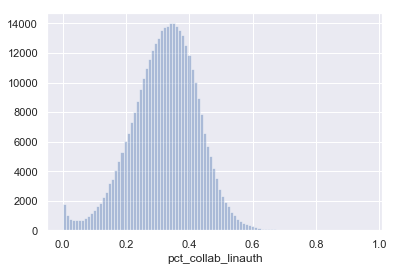

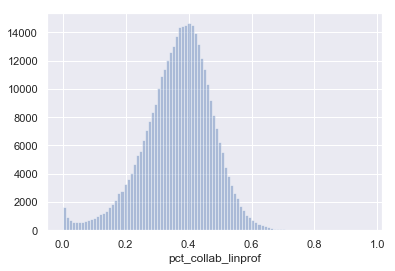

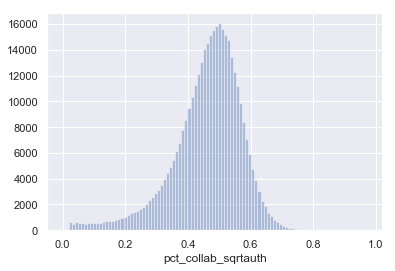

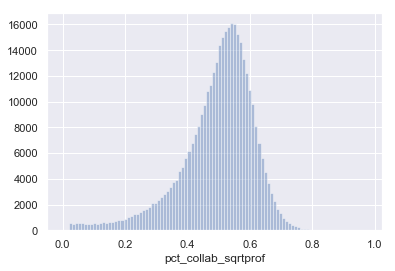

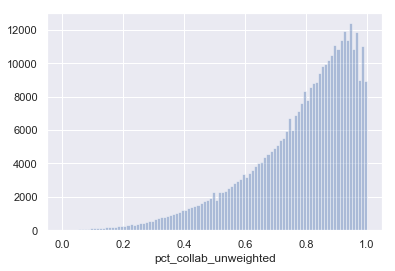

In [14]:
plot(df_collab_trim, [col for col in df_collab.columns if col != 'num_pubs'], log_scale = False)

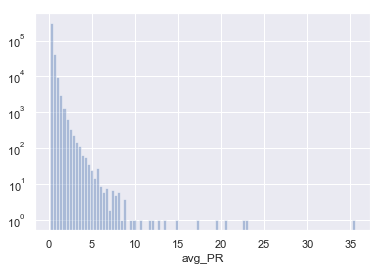

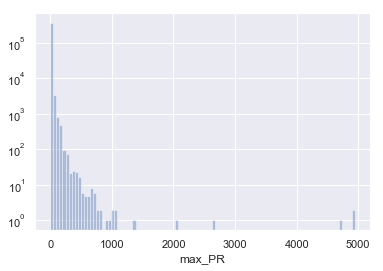

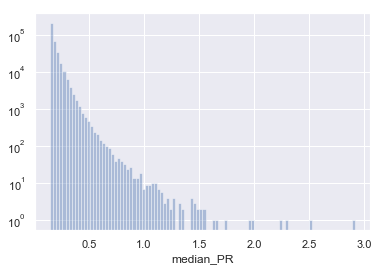

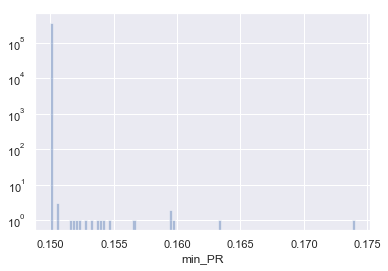

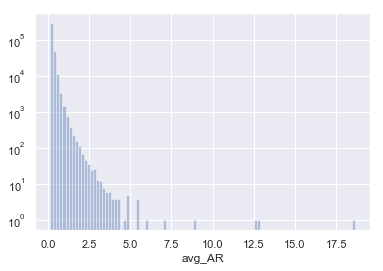

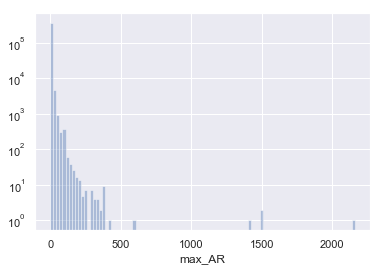

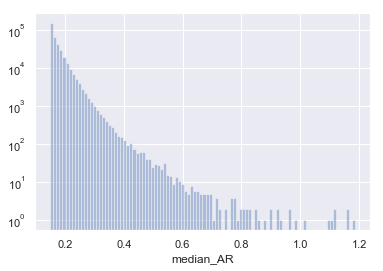

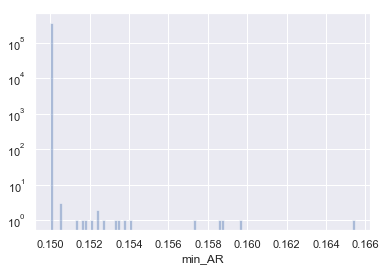

In [15]:
plot(df_impact_trim, df_impact.columns, log_scale = True)

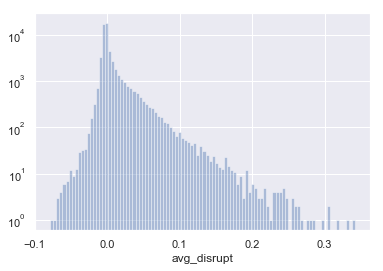

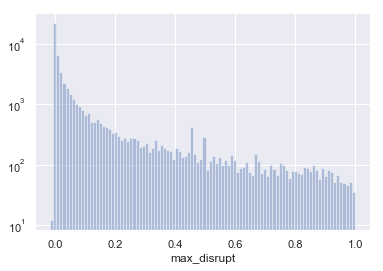

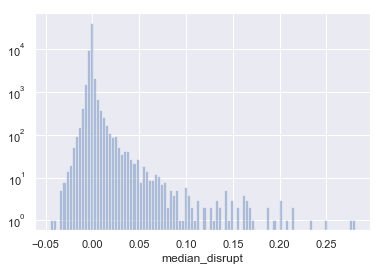

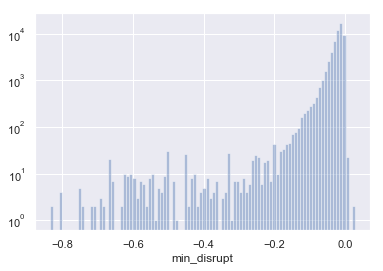

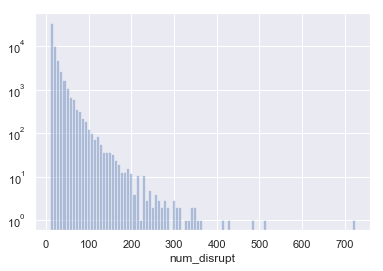

In [17]:
plot(df_disrupt_trim, df_disrupt.columns, log_scale = True)

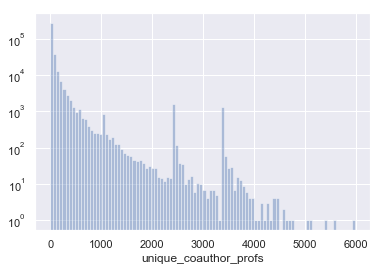

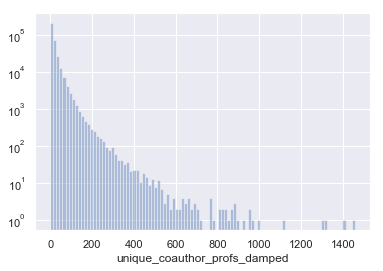

In [18]:
plot(df_unique_profs_trim, df_unique_profs.columns, log_scale = True)